In [1]:
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')

Data source import complete.


# **Customer Churn Analysis**
**Goal:** \

  Understand patterns and key factors that influence customer churn in a telecom company using the Telco Customer Churn dataset.

**Focus Areas:**
- Impact of Contract and Internet Service on Churn
- Customer Tenure Segmentation and Churn Trends
- Visual Exploration of Churn Patterns Over Time

**This notebook covers:**
*   Data Cleaning  
*   Visual EDA and Insight Extraction  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading and Inspecting the data**

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Cleaning and Prepareing**

In [8]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
# Handle missing values

df.dropna(inplace=True)

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Map churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#**Impact of Contract and Internet Service on Churn**

Let us get a quick understanding of how many customers have left the company.

We begin by calculating the overall churn rate in the dataset. This gives us a quick understanding of how many customers have left the company.

In [11]:
#Overall churn rate
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


Next, we examine how many customers are on each type of contract.

In [12]:
#Count of each contract type
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


Now we calculate the churn rate within each contract type to identify if certain contracts are more likely to result in churn.

In [13]:
#Churn rate by contract type
df.groupby('Contract')['Churn'].mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


📌 Insight Example: If customers on "Month-to-month" contracts have a much higher churn rate than those on "Two year" contracts, it may suggest that longer commitments improve retention.

We can also calculate the average monthly charge for each contract group. This helps identify pricing patterns — for example, are long-term customers paying more or less per month?

In [14]:
#Average Monthly Charges by Contract Type
df.groupby('Contract')['MonthlyCharges'].mean()

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.079416
Two year,60.872374


To identify if certain internet types correlate with higher customer loss, we can group the customers based on the type of internet service they use (e.g., DSL, Fiber optic, No internet).





In [15]:
#Churn Rate by Internet Service Type
df.groupby('InternetService')['Churn'].mean()

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


📌 Insight Example: If churn is much higher for "Fiber optic" users, the company may want to investigate service quality or pricing for that segment.

# **Customer Tenure Segmentation and Churn Trends**

First of all, we will create custom tenure buckets to segment customers based on how long they’ve been with the company.\
The **`tenure`** column in the dataset indicates how many months a customer has stayed with the company.

In [16]:
#Create Tenure Groups Using Binning
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 12, 24, 48, 60, 72],
                            labels=['0-12','13-24','25-48','49-60','61-72'])

Then, we will calculate the churn rate for each tenure group.

Sorting the values can help us quickly identify which tenure range has the highest risk of churn.

In [17]:
df.groupby('tenure_group')['Churn'].mean().sort_values(ascending=False)

<ipython-input-17-49c521b0882e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['Churn'].mean().sort_values(ascending=False)


,Churn
tenure_group,
0-12,0.476782
13-24,0.287109
25-48,0.203890
49-60,0.144231
61-72,0.066098


📌 Insight Example: If churn is highest in the 0–12 month group, onboarding and early retention strategies may need improvement.

# **Visual Exploration of Churn Patterns Over Time**


We will start by visualizing churn behavior across different tenure values.

<ipython-input-18-5baaaf43811e>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


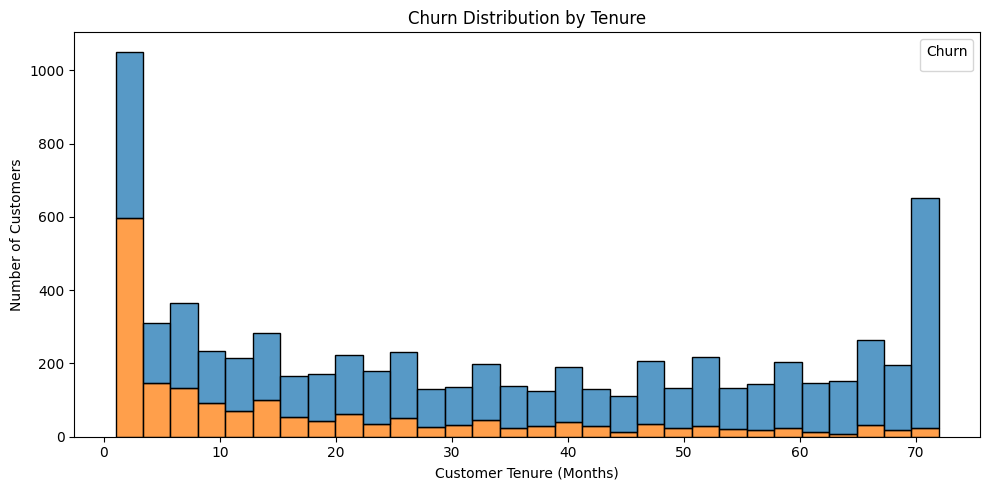

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visual comparison of churned vs. retained customers over different tenure periods.
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Churn Distribution by Tenure')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

Additionally, using a Binned Bar Plot, we can get the Churn Rate by Tenure Group.

<ipython-input-19-128cc78eb2e9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby('tenure_group')['Churn'].mean().reset_index(),
<ipython-input-19-128cc78eb2e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


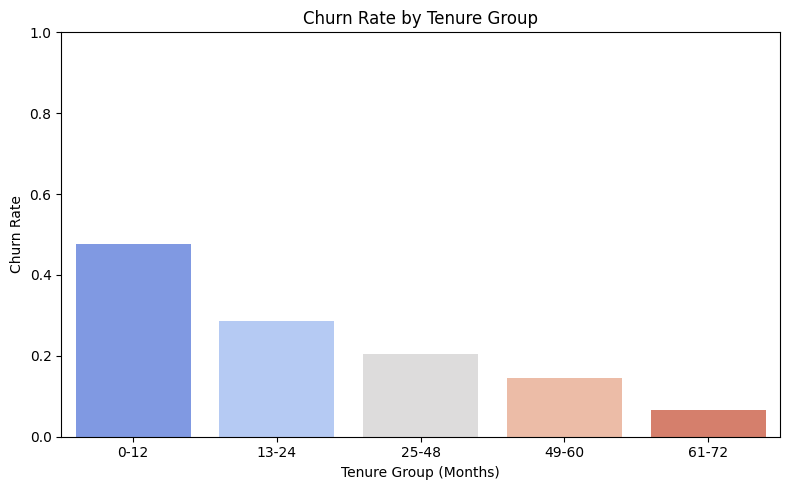

In [19]:
#Average churn rate in each tenure bucket.
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df.groupby('tenure_group')['Churn'].mean().reset_index(),
    x='tenure_group',
    y='Churn',
    palette='coolwarm'
)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

📌 Insight Summary: Churn is highest among new customers and longer-tenured customers tend to churn less, indicating stronger loyalty over time.

**Business implication: Invest in early retention strategies, welcome offers, and proactive support during the first year.**